In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/Customer churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.drop('customerID', axis=1, inplace=True)

In [5]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
pd.to_numeric(data.TotalCharges)

ValueError: ignored

So here we can see that some values are blank.

In [7]:
data.shape

(7043, 20)

In [8]:
data[data.TotalCharges==' '].shape

(11, 20)

So here we see that 11 blank spaces are there

In [9]:
data1 = data[data.TotalCharges!=' ']

In [10]:
data1.shape

(7032, 20)

In [11]:
data1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
data1['TotalCharges'] = pd.to_numeric(data1.TotalCharges)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
data1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


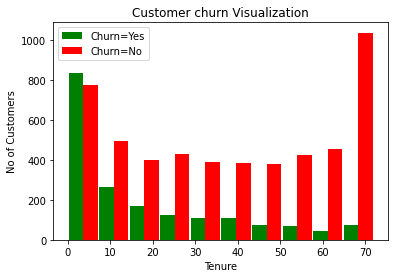

In [15]:
tenure_churn_no = data[data.Churn=='No'].tenure
tenure_churn_yes = data[data.Churn=='Yes'].tenure
plt.xlabel('Tenure')
plt.ylabel('No of Customers')
plt.title('Customer churn Visualization')
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


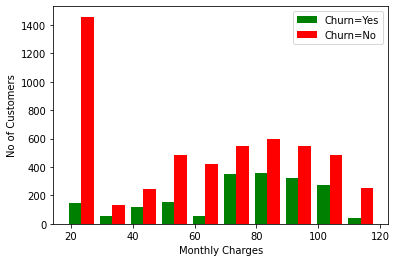

In [16]:
mc_churn_yes = data[data.Churn=='Yes'].MonthlyCharges
mc_churn_no = data[data.Churn=='No'].MonthlyCharges
plt.xlabel('Monthly Charges')
plt.ylabel('No of Customers')
plt.hist([mc_churn_yes, mc_churn_no],color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [17]:
def print_unique(a):
  for i in a:
    if a[i].dtypes=='object':
      print(f'{i}: {a[i].unique()}')

In [18]:
print_unique(data1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [19]:
data1.replace('No phone service', 'No', inplace=True)
data1.replace('No internet service', 'No', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Here we need to convert Yes and No into Numbers

In [20]:
yes_no = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
          'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
          'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

In [21]:
for i in yes_no:
  data1[i].replace({'Yes':1,'No':0},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [25]:
for i in data1:
  print(f'{i}: {data1[i].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [26]:
data2 = pd.get_dummies(data=data1, columns=['gender', 'InternetService', 
                                            'Contract', 'PaymentMethod'])

In [27]:
data2.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,1,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,1,0,1,0,0,0,0,1,0


In [29]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
mms=MinMaxScaler()
data2[cols_to_scale] = mms.fit_transform(data2[cols_to_scale])

In [30]:
x = data2.drop('Churn', axis=1)
y = data2[['Churn']]

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)

In [36]:
x_train.shape

(5625, 27)

In [37]:
y_train.shape

(5625, 1)

In [33]:
len(x_train.columns)

27

Build **ANN** model

In [32]:
import tensorflow as tf

In [42]:
layers = [
          tf.keras.layers.Dense(100, activation='relu', input_shape=(27,)),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100, activation='relu'),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(1, activation='sigmoid')
]

model = tf.keras.models.Sequential(layers)

model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ['Accuracy'])

model.fit(x_train, y_train, epochs=20)

Epoch 1/20
176/176 [==============================] - 1s 2ms/step - loss: 0.4760 - Accuracy: 0.7723
Epoch 2/20
176/176 [==============================] - 0s 2ms/step - loss: 0.4409 - Accuracy: 0.7879
Epoch 3/20
176/176 [==============================] - 0s 2ms/step - loss: 0.4285 - Accuracy: 0.8039
Epoch 4/20
176/176 [==============================] - 0s 3ms/step - loss: 0.4253 - Accuracy: 0.8032
Epoch 5/20
176/176 [==============================] - 0s 3ms/step - loss: 0.4250 - Accuracy: 0.7995
Epoch 6/20
176/176 [==============================] - 0s 2ms/step - loss: 0.4236 - Accuracy: 0.7982
Epoch 7/20
176/176 [==============================] - 0s 3ms/step - loss: 0.4207 - Accuracy: 0.8052
Epoch 8/20
176/176 [==============================] - 1s 3ms/step - loss: 0.4121 - Accuracy: 0.8066
Epoch 9/20
176/176 [==============================] - 1s 3ms/step - loss: 0.4213 - Accuracy: 0.8009
Epoch 10/20
176/176 [==============================] - 0s 3ms/step - loss: 0.4122 - Accuracy: 0.8050

In [43]:
y_predict = model.predict(x_test)

In [48]:
y_predict

array([[0.00844285],
       [0.7574924 ],
       [0.14925024],
       ...,
       [0.15040672],
       [0.14220941],
       [0.15062562]], dtype=float32)

In [49]:
y_pred = []
for i in y_predict:
  if i>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

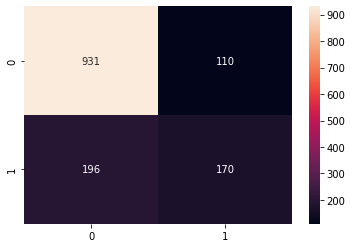

In [51]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
sns.heatmap(cm,annot=True, fmt='d')

In [52]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1041
           1       0.61      0.46      0.53       366

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407

